In [94]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


c:\users\rbd218\appdata\local\programs\python\python38\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['angle']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [95]:
!pip install JSAnimation

# Part 4a

In [1]:
pi = np.pi


NameError: name 'np' is not defined

In [97]:
# import random
# random.seed(133)
# random.uniform(1, 2)

In [98]:
# Create Shape 
# --> TODO: Need a way to make shape that is full-rank
# --> skipping making it full-rank for now 

import numpy as np
pi = np.pi


# Reference for plotting different shapes
#   : https://stackoverflow.com/questions/15714159/drawing-a-star-what-is-sine-and-cosine-actually-in-reference-to

x = 0
y = 0
angle = 0
num_rotors = 6
angle_step = (2*pi) / num_rotors 
D_list = list()

'''
creates a D-array / shape with n number of rotors 
'''
for i in range(num_rotors) : 
    angle = angle_step * i 
    # angle = angle_step #* random.uniform(1, 2)
    # append  x, z, theta 
    
    # originally a regular polygon had only rank 2 
    # D_list.append([np.cos(angle), np.sin(angle), angle]) ==> ONLY RANK 2 
    
    # HAD TO DISTRORT SHAPE TO GET RANK 3 
    D_list.append([np.cos(angle - .2 - i/num_rotors ), np.sin(angle - .1 - i/num_rotors), angle/(i + 1)]) # ==> RANK 3 BETTER # ==> RANK 3 BETTER
    # STILL DID NOT ACHIEVE FULL RANK ?? 
    

D_list
D_array = np.array(D_list)

D_array


array([[ 0.98006658, -0.09983342,  0.        ],
       [ 0.77723879,  0.70365673,  0.52359878],
       [ 0.0097344 ,  0.99592884,  0.6981317 ],
       [-0.76484219,  0.56464247,  0.78539816],
       [-0.98374851, -0.27686582,  0.83775804],
       [-0.48794557, -0.9172266 ,  0.87266463]])

In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import numpy

import scipy.integrate as integrate
import matplotlib.animation as animation


         
from JSAnimation import IPython_display    
from IPython.display import HTML

from matplotlib import pyplot as plt
from scipy.linalg import norm


In [100]:
# Before Transformation

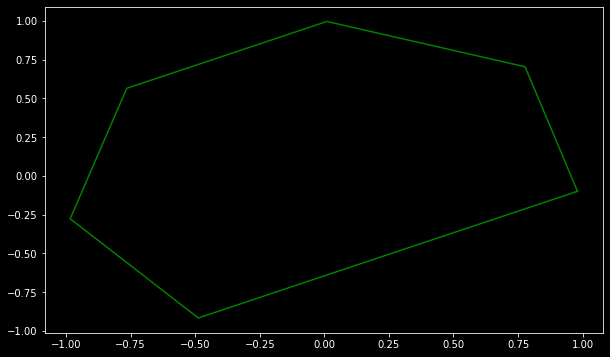

In [101]:

fig, ax = plt.subplots()


# Plot D_array - x, y, alpha/theta : 


# Reference for understanding ax.plot 
#   : https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html

# ax.plot(list(D_array[:,0]), list(list(D_array[:,1]) )) # Doesn't include the line first to last point

ax.plot(list(D_array[:,0]) + [list(D_array[:,0])[0]], list(list(D_array[:,1])) + [list(D_array[:,1])[0]],'g')




In [102]:
# To Test rank / print only / comment this out later and use create_A_array(D_array)
''''''
a = list(D_array[:,2])

x = list(D_array[:,0])
z = list(D_array[:,1])
a = list(D_array[:,2])
# direction vectors 
# TODO: in the future could implement this part to work for n rotors rather than hardcoding for 6 : 
fx_d = np.array([np.cos(a[0]),np.cos(a[1]), np.cos(a[2]), np.cos(a[3]), np.cos(a[4]), np.cos(a[5])])
fz_d = np.array([np.sin(a[0]),np.sin(a[1]), np.sin(a[2]), np.sin(a[3]), np.sin(a[4]), np.sin(a[5])])
t_d = np.array([x[0]*np.sin(a[0]) - np.cos(a[0])*z[0],
                x[1]*np.sin(a[1]) - np.cos(a[1])*z[1], 
                x[2]*np.sin(a[2]) - np.cos(a[2])*z[2],
                x[3]*np.sin(a[3]) - np.cos(a[3])*z[3], 
                x[4]*np.sin(a[4]) - np.cos(a[4])*z[4],
                x[5]*np.sin(a[5]) - np.cos(a[5])*z[5]])

A = np.array([fx_d, fz_d, t_d])

A[:0] # have an array A of fx, fz, t 
A[:,5] # last point in octagon 
rank = np.linalg.matrix_rank(A) # Why is this rank 2 not 6 ? 
# I think only a scalene triangle would be full-rank ?? or is the maximum rank possible 3 even with 6 rotors ? 
# the rank is equal to the number of independent columns so there should be 6 
# ***unless it is the transpose of A here then it would be the full rank = 3 ?

# Going to continue with just rank = 3 for now because I do not know 
# A
print("Rank is", rank, "but do not understand how to make this full rank (=6) so continued with part 4b")
A

Rank is 3 but do not understand how to make this full rank (=6) so continued with part 4b


array([[ 1.        ,  0.8660254 ,  0.76604444,  0.70710678,  0.66913061,
         0.64278761],
       [ 0.        ,  0.5       ,  0.64278761,  0.70710678,  0.74314483,
         0.76604444],
       [ 0.09983342, -0.22076521, -0.7566686 , -0.94008762, -0.54580822,
         0.2157939 ]])

In [103]:
# A is the direction of the force vector and the cross product of the point and 
# the force 

# A = A(D) 
def create_A_array(RA_array) : # rotation ? 
    # alpha , a is D[:2]
    '''
    Takes alpha and the D_array of poa = list(D_array[:,2])
fx_d = np.array([np.cos(a[0]),np.cos(a[1]), np.cos(a[2]), np.cos(a[3]), np.cos(a[4]), np.cos(a[5])])
fx_dints and orientations and 
    create an A array 
    A is the direction of the force vector and the cross product of the point 
    '''
    x = list(RA_array[:,0])
    z = list(RA_array[:,1])
    a = list(RA_array[:,2])
    # direction vectors 
    # TODO: in the future could implement this part to work for n rotors rather than hardcoding for 6 : 
    fx_d = np.array([np.cos(a[0]),np.cos(a[1]), np.cos(a[2]), np.cos(a[3]), np.cos(a[4]), np.cos(a[5])])
    fz_d = np.array([np.sin(a[0]),np.sin(a[1]), np.sin(a[2]), np.sin(a[3]), np.sin(a[4]), np.sin(a[5])])
    t_d = np.array([x[0]*np.sin(a[0]) - np.cos(a[0])*z[0],
                    x[1]*np.sin(a[1]) - np.cos(a[1])*z[1], 
                    x[2]*np.sin(a[2]) - np.cos(a[2])*z[2],
                    x[3]*np.sin(a[3]) - np.cos(a[3])*z[3], 
                    x[4]*np.sin(a[4]) - np.cos(a[4])*z[4],
                    x[5]*np.sin(a[5]) - np.cos(a[5])*z[5]])

    A = np.array([fx_d, fz_d, t_d])
    return A

A = create_A_array(RA_array)
A

array([[ 1.        ,  0.8660254 ,  0.76604444,  0.70710678,  0.66913061,
         0.64278761],
       [ 0.        ,  0.5       ,  0.64278761,  0.70710678,  0.74314483,
         0.76604444],
       [ 0.09983342, -0.22076521, -0.7566686 , -0.94008762, -0.54580822,
         0.2157939 ]])

# Part 4b

In [104]:
# rotatation matrix
def rotate(theta) : 
    A = np.array([[np.cos(theta), -np.sin(theta), 0], 
         [np.sin(theta), np.cos(theta), 0], 
         [0,0,1]])
    return A

rotate(0)

array([[ 1., -0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [105]:
for x in D_array: 
    print(x.shape)
    print(rotate(0).shape)
    print(x)
    break
rotate(0)

(3,)
(3, 3)
[ 0.98006658 -0.09983342  0.        ]


array([[ 1., -0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [113]:
A = create_A_array(D_array)
R = rotate(0) # TODO: This is just the identity matrix - theta should not be zero ?

list_RA = list()
for p in D_array:
    RA = np.dot(p, R)
    list_RA.append(list(RA))
    
#list_RA

RA_array = np.array(list_RA)
RA_array
# print("D_array", D_array)

array([[ 0.98006658, -0.09983342,  0.        ],
       [ 0.77723879,  0.70365673,  0.52359878],
       [ 0.0097344 ,  0.99592884,  0.6981317 ],
       [-0.76484219,  0.56464247,  0.78539816],
       [-0.98374851, -0.27686582,  0.83775804],
       [-0.48794557, -0.9172266 ,  0.87266463]])

array([0.        , 0.52359878, 0.6981317 , 0.78539816, 0.83775804,
       0.87266463])

In [107]:
# Do we have the velocity measurements ?
# Controlls

x = RA_array[:,0]
z = RA_array[:,1]
th = RA_array[:,2]

run_time  = 7
kp_x = 2
kp_z = 2
kp_th = 2

kd_x = 2
kd_z = 2
kd_th = 2

delta_t = .005 # in seconds 

mass = 1 
inertia = .01
while delta_t < run_time :

    dd_x = kp_x * (target_x - x) + kd_x * (-d_x) 
    dd_z = kp_z * (target_z - z) + kd_z * (-d_z) 
    dd_th = kp_t * (target_th - th) + kd_th * (-d_th)
    t = t + delta_t
    
    # assumming mass is 1 and inertia are .01 for now 
    wrench = [mass * dd_x, mass * dd_z , dd_th * inertia]
    
    
    B = 
    
    
    
    



SyntaxError: invalid syntax (<ipython-input-107-be32001e041a>, line 13)

In [ ]:
# wrench [fx, fy, t]


In [ ]:
# TODO include the notes from class that you accummulated 
from IPython.display import Image
Image("img/picture.jpg")

In [296]:
# https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214
# e.g. $\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $